# Multiple Linear Regression
## Car Prices Case Study





### Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
#importing the csv file
automobile=pd.read_csv("CarPrice_Assignment.csv")


In [4]:

automobile.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#spliting the CarName column for bifercation of car name and company name
splitCarName=automobile["CarName"].str.split(" ",n=1,expand=True)
automobile["CompanyName"]= splitCarName[0] 
automobile["Car"]=splitCarName[1]
automobile

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,Car
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.00,102,5500,24,30,13950.000,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.00,115,5500,18,22,17450.000,audi,100ls
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.50,110,5500,19,25,15250.000,audi,fox
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.50,110,5500,19,25,17710.000,audi,100ls
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.50,110,5500,19,25,18920.000,audi,5000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.30,140,5500,17,20,23875.000,audi,4000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,3.13,3.40,7.00,160,5500,16,22,17859.167,audi,5000s (diesel)


In [6]:
automobile.shape

(205, 28)

In [7]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
automobile.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# dropping columns Car & CarName as these are not required in the analysis
automobile = automobile.drop(['Car', 'CarName'],axis=1)
automobile

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,audi
5,6,2,gas,std,two,sedan,fwd,front,99.8,177.3,...,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,audi
6,7,1,gas,std,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,audi
7,8,1,gas,std,four,wagon,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,audi
8,9,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,audi
9,10,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167,audi


In [10]:
# checking the dataframe again for automobile info
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

## Step 2: Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

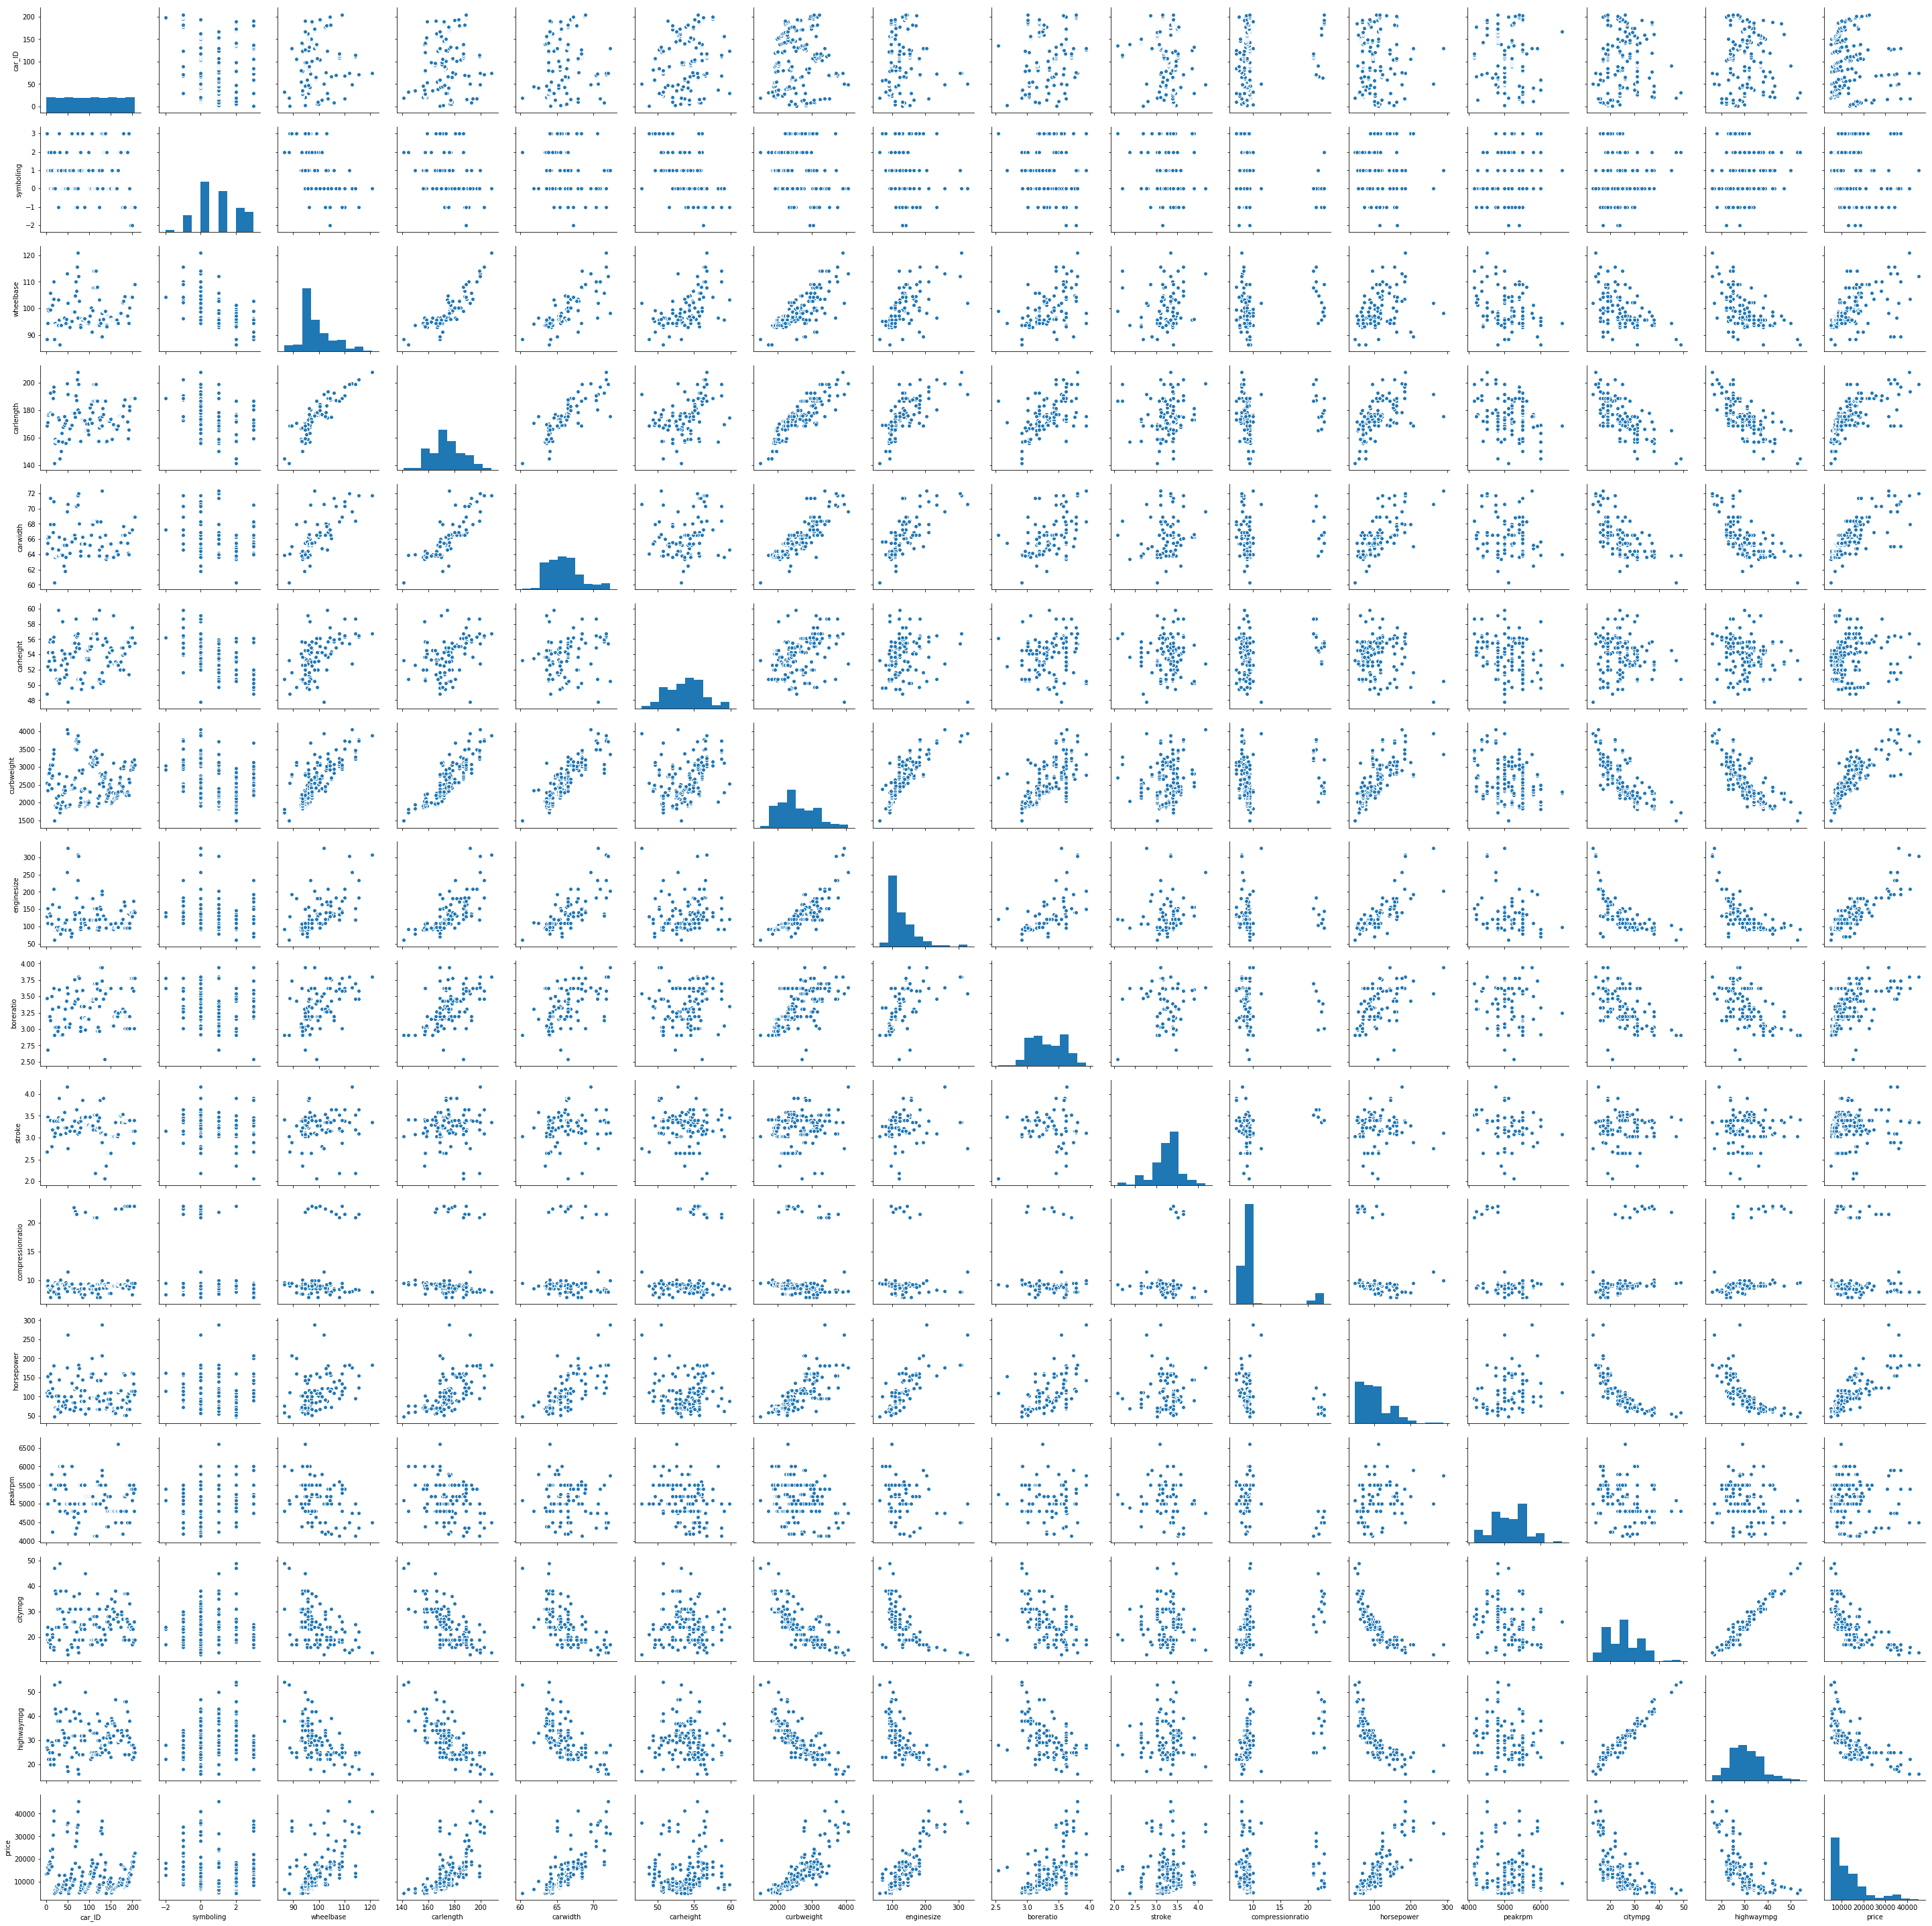

In [12]:
sns.pairplot(automobile)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

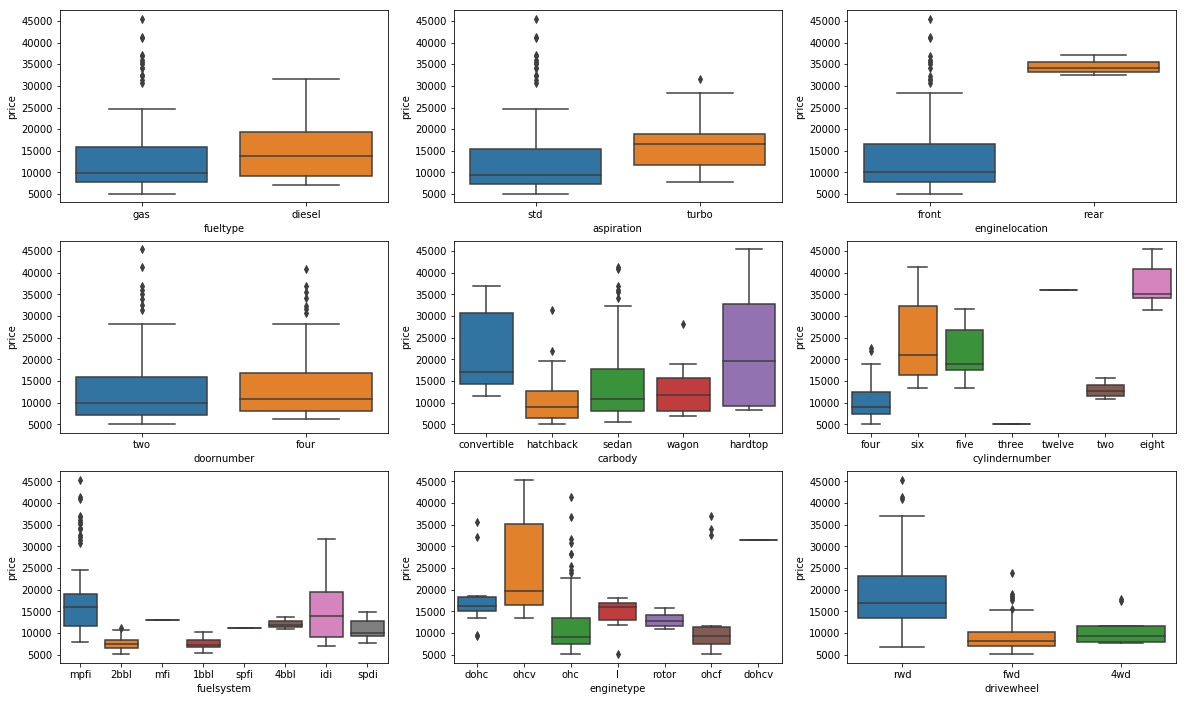

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = automobile)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = automobile)
plt.subplot(3,3,3)
sns.boxplot(x = 'enginelocation', y = 'price', data = automobile)
plt.subplot(3,3,4)
sns.boxplot(x='doornumber', y='price',data=automobile)
plt.subplot(3,3,5)
sns.boxplot(x='carbody', y='price',data=automobile)
plt.subplot(3,3,6)
sns.boxplot(x='cylindernumber', y='price',data=automobile)
plt.subplot(3,3,7)
sns.boxplot(x='fuelsystem', y='price',data=automobile)
plt.subplot(3,3,8)
sns.boxplot(x='enginetype', y='price',data=automobile)
plt.subplot(3,3,9)
sns.boxplot(x='drivewheel', y='price',data=automobile)
plt.show()

In [14]:
varlist =  ['fueltype','aspiration','enginelocation','doornumber']

# Defining the map function
def binary_map(x):
    return x.map({'gas': 1, "diesel": 0,'std': 1, "turbo": 0,'front': 1, "rear": 0,'two': 1, "four": 0})

# Applying the function to the housing list
automobile[varlist] = automobile[varlist].apply(binary_map)

In [15]:
automobile

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,1,1,1,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero
1,2,3,1,1,1,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero
2,3,1,1,1,1,hatchback,rwd,1,94.5,171.2,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero
3,4,2,1,1,0,sedan,fwd,1,99.8,176.6,...,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,audi
4,5,2,1,1,0,sedan,4wd,1,99.4,176.6,...,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,audi
5,6,2,1,1,1,sedan,fwd,1,99.8,177.3,...,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,audi
6,7,1,1,1,0,sedan,fwd,1,105.8,192.7,...,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,audi
7,8,1,1,1,0,wagon,fwd,1,105.8,192.7,...,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,audi
8,9,1,1,0,0,sedan,fwd,1,105.8,192.7,...,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,audi
9,10,0,1,0,1,hatchback,4wd,1,99.5,178.2,...,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167,audi


### Step 3 : Creating  Dummy Variables

In [16]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'wheelstatus' 
# and checking what the dataset 'status' looks like

wheelstatus = pd.get_dummies(automobile['drivewheel'])
wheelstatus.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [17]:
# Let's drop the first column from wheelstatus df using 'drop_first = True'
wheelstatus= pd.get_dummies(automobile['drivewheel'], drop_first = True)


In [18]:
# Add the results to the original automobile dataframe
automobile = pd.concat([automobile, wheelstatus], axis = 1)

In [19]:
# Drop 'drivewheel' as we have created the dummies for it

automobile.drop(['drivewheel'], axis = 1, inplace = True)

In [20]:
# Now let's see the head of our dataframe.
automobile.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,fwd,rwd
0,1,3,1,1,1,convertible,1,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,1
1,2,3,1,1,1,convertible,1,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,1
2,3,1,1,1,1,hatchback,1,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,1
3,4,2,1,1,0,sedan,1,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950.0,audi,1,0
4,5,2,1,1,0,sedan,1,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,0,0


In [21]:

carbody = pd.get_dummies(automobile['carbody'])
carbody.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [22]:
carbody= pd.get_dummies(automobile['carbody'], drop_first = True)


In [23]:
automobile = pd.concat([automobile, carbody], axis = 1)

In [24]:
automobile.drop(['carbody'], axis = 1, inplace = True)
automobile.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,citympg,highwaympg,price,CompanyName,fwd,rwd,hardtop,hatchback,sedan,wagon
0,1,3,1,1,1,1,88.6,168.8,64.1,48.8,...,21,27,13495.0,alfa-romero,0,1,0,0,0,0
1,2,3,1,1,1,1,88.6,168.8,64.1,48.8,...,21,27,16500.0,alfa-romero,0,1,0,0,0,0
2,3,1,1,1,1,1,94.5,171.2,65.5,52.4,...,19,26,16500.0,alfa-romero,0,1,0,1,0,0
3,4,2,1,1,0,1,99.8,176.6,66.2,54.3,...,24,30,13950.0,audi,1,0,0,0,1,0
4,5,2,1,1,0,1,99.4,176.6,66.4,54.3,...,18,22,17450.0,audi,0,0,0,0,1,0


In [25]:
cylindernumber= pd.get_dummies(automobile['cylindernumber'], drop_first = True)
cylindernumber.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [26]:
cylindernumber= pd.get_dummies(automobile['cylindernumber'], drop_first = True)

In [27]:
automobile = pd.concat([automobile, cylindernumber], axis = 1)

In [28]:
automobile.drop(['cylindernumber'], axis = 1, inplace = True)
automobile.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,hardtop,hatchback,sedan,wagon,five,four,six,three,twelve,two
0,1,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,1,0,0,0,0
1,2,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,1,0,0,0,0
2,3,1,1,1,1,1,94.5,171.2,65.5,52.4,...,0,1,0,0,0,0,1,0,0,0
3,4,2,1,1,0,1,99.8,176.6,66.2,54.3,...,0,0,1,0,0,1,0,0,0,0
4,5,2,1,1,0,1,99.4,176.6,66.4,54.3,...,0,0,1,0,1,0,0,0,0,0


In [29]:
fuelsystem=pd.get_dummies(automobile['fuelsystem'])
fuelsystem.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [30]:
fuelsystem=pd.get_dummies(automobile['fuelsystem'],drop_first=True)


In [31]:
automobile=pd.concat([automobile,fuelsystem],axis=1)

In [32]:
automobile.drop(['fuelsystem'], axis = 1, inplace = True)
automobile.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,1,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,4,2,1,1,0,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,0,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0


In [33]:
enginetype= pd.get_dummies(automobile['enginetype'], drop_first = True)
enginetype.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [34]:
automobile=pd.concat([automobile,enginetype],axis=1)

In [35]:
automobile.drop(['enginetype'], axis = 1, inplace = True)
automobile.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,1,0,0,0,0,0,0,0,0
1,2,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,1,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,94.5,171.2,65.5,52.4,...,0,1,0,0,0,0,0,0,1,0
3,4,2,1,1,0,1,99.8,176.6,66.2,54.3,...,0,1,0,0,0,0,1,0,0,0
4,5,2,1,1,0,1,99.4,176.6,66.4,54.3,...,0,1,0,0,0,0,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets


In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(automobile, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
# Apply scaler() to all the columns except  'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','curbweight','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
df_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
122,123,1,1,1,0,1,0.244828,0.426016,0.291667,0.265487,...,0,0,0,0,0,0,1,0,0,0
125,126,3,1,1,1,1,0.272414,0.452033,0.666667,0.212389,...,0,1,0,0,0,0,1,0,0,0
166,167,1,1,1,1,1,0.272414,0.448780,0.308333,0.424779,...,0,1,0,0,0,0,0,0,0,0
1,2,3,1,1,1,1,0.068966,0.450407,0.316667,0.088496,...,0,1,0,0,0,0,0,0,0,0
199,200,-1,1,0,0,1,0.610345,0.775610,0.575000,0.858407,...,0,1,0,0,0,0,1,0,0,0


In [41]:
df_train.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.524476,0.797203,0.909091,0.818182,0.440559,0.993007,0.411141,0.525476,0.461655,0.509004,...,0.0,0.440559,0.041958,0.0,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972
std,58.977655,1.195999,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,...,0.0,0.498199,0.201198,0.0,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,0.000000,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.522124,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,147.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,...,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,205.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


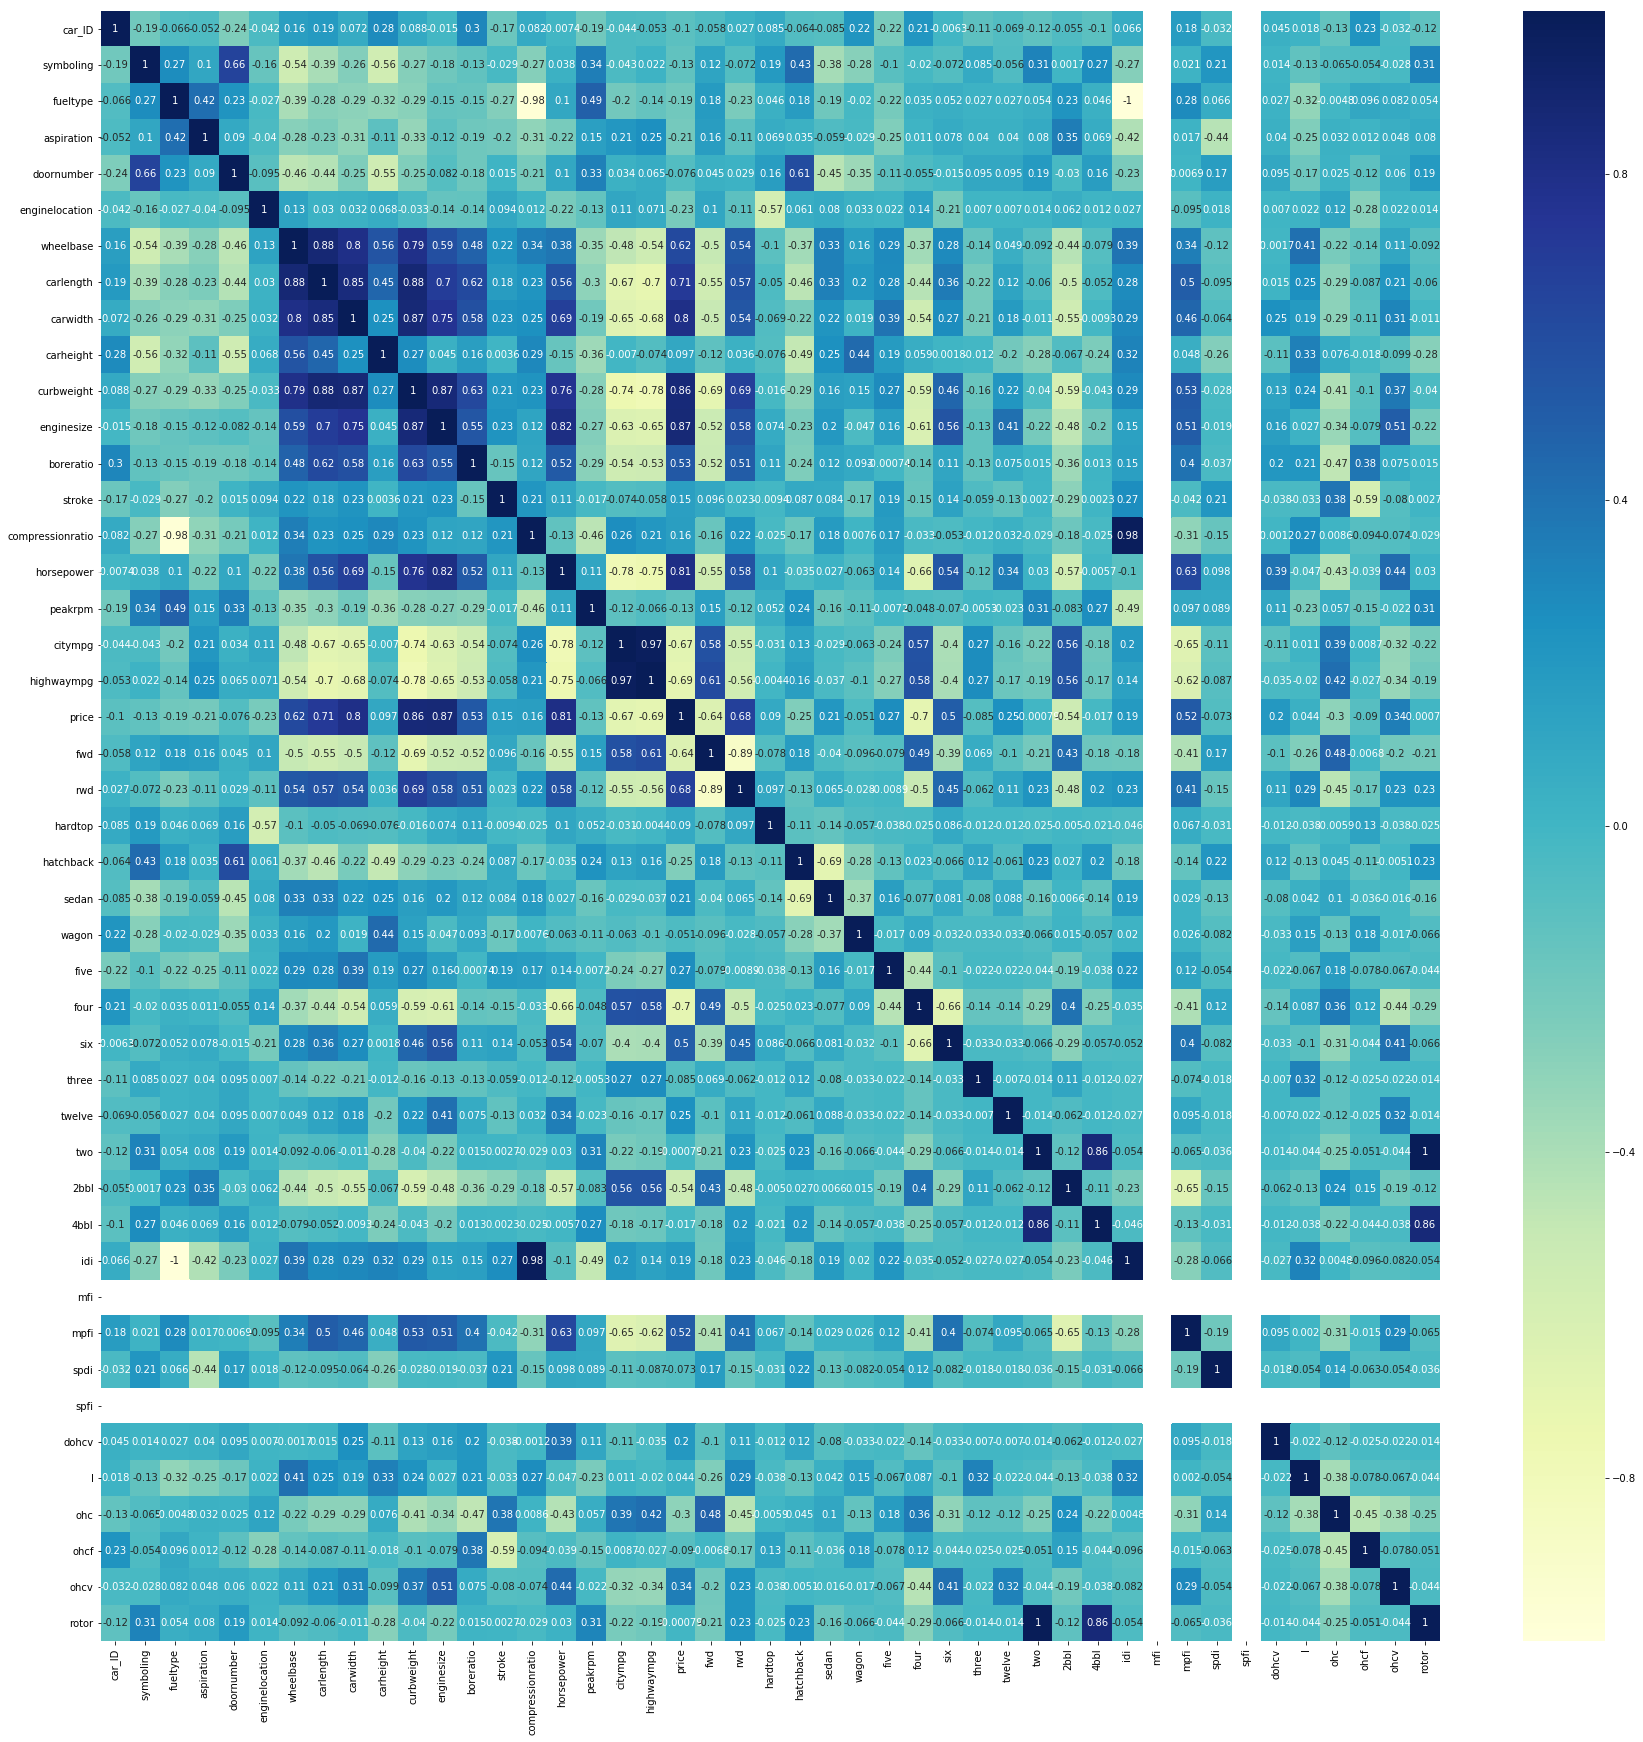

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Step 4: Dividing into X and Y sets for the model building

In [43]:
y_train = df_train.pop('price')
X_train = df_train

In [44]:
df_train.drop(['CompanyName'],axis=1,inplace=True)

## Building our model

### RFE
Recursive feature elimination

In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 32),
 ('symboling', False, 28),
 ('fueltype', False, 3),
 ('aspiration', False, 21),
 ('doornumber', False, 33),
 ('enginelocation', True, 1),
 ('wheelbase', False, 16),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 5),
 ('stroke', True, 1),
 ('compressionratio', False, 4),
 ('horsepower', True, 1),
 ('peakrpm', False, 8),
 ('citympg', False, 13),
 ('highwaympg', False, 14),
 ('fwd', False, 25),
 ('rwd', False, 22),
 ('hardtop', False, 18),
 ('hatchback', False, 17),
 ('sedan', False, 20),
 ('wagon', False, 19),
 ('five', False, 27),
 ('four', False, 10),
 ('six', False, 30),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 31),
 ('4bbl', False, 26),
 ('idi', False, 7),
 ('mfi', False, 35),
 ('mpfi', False, 29),
 ('spdi', False, 11),
 ('spfi', False, 34),
 ('dohcv', False, 9),
 ('l', False, 24),
 ('ohc', False, 2),
 ('ohcf', False, 1

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'stroke',
       'horsepower', 'three', 'twelve', 'two', 'rotor'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'wheelbase', 'carlength', 'carheight', 'boreratio', 'compressionratio',
       'peakrpm', 'citympg', 'highwaympg', 'fwd', 'rwd', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'five', 'four', 'six', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [51]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [52]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [53]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     95.07
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.64e-53
Time:                        22:50:30   Log-Likelihood:                 160.37
No. Observations:                 143   AIC:                            -300.7
Df Residuals:                     133   BIC:                            -271.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1800      0.089      2.

In [54]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
43,rotor,inf
30,two,inf
2,fueltype,1423.810000
33,idi,463.210000
14,compressionratio,204.170000
11,enginesize,118.000000
26,four,109.500000
10,curbweight,44.770000
18,highwaympg,44.160000
17,citympg,42.450000


In [56]:
X_train_new = X_train_rfe.drop(["horsepower"], axis = 1)

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [58]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [59]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.58e-54
Time:                        22:50:31   Log-Likelihood:                 159.46
No. Observations:                 143   AIC:                            -300.9
Df Residuals:                     134   BIC:                            -274.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2050      0.087      2.

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,two,inf
9,rotor,inf
0,const,162.140000
3,curbweight,8.340000
4,enginesize,7.120000
2,carwidth,4.450000
7,twelve,1.560000
5,stroke,1.190000
1,enginelocation,1.140000
6,three,1.050000


In [62]:
X_train_new1 = X_train_new.drop(["curbweight"], axis = 1)

In [63]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

In [64]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [65]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.05e-54
Time:                        22:50:31   Log-Likelihood:                 158.17
No. Observations:                 143   AIC:                            -300.3
Df Residuals:                     135   BIC:                            -276.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1889      0.087      2.

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,two,inf
8,rotor,inf
0,const,159.880000
3,enginesize,3.760000
2,carwidth,2.880000
6,twelve,1.420000
4,stroke,1.170000
1,enginelocation,1.120000
5,three,1.050000


In [68]:
X_train_new2 = X_train_new1.drop(["three"], axis = 1)

In [69]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

In [70]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [71]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           9.97e-55
Time:                        22:50:32   Log-Likelihood:                 155.56
No. Observations:                 143   AIC:                            -297.1
Df Residuals:                     136   BIC:                            -276.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1948      0.088      2.

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,two,inf
7,rotor,inf
0,const,159.740000
3,enginesize,3.750000
2,carwidth,2.810000
5,twelve,1.420000
4,stroke,1.170000
1,enginelocation,1.120000


In [74]:
X_train_new3 = X_train_new2.drop(["stroke"], axis = 1)

In [75]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

In [76]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [77]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     154.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.53e-54
Time:                        22:50:33   Log-Likelihood:                 152.39
No. Observations:                 143   AIC:                            -292.8
Df Residuals:                     137   BIC:                            -275.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1762      0.090      1.

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,two,inf
6,rotor,inf
0,const,158.590000
3,enginesize,3.550000
2,carwidth,2.810000
4,twelve,1.320000
1,enginelocation,1.100000


In [80]:
X_train_new4 = X_train_new3.drop(["two"], axis = 1)

In [81]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)

In [82]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [83]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     154.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.53e-54
Time:                        22:50:34   Log-Likelihood:                 152.39
No. Observations:                 143   AIC:                            -292.8
Df Residuals:                     137   BIC:                            -275.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1762      0.090      1.

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,158.59
3,enginesize,3.55
2,carwidth,2.81
4,twelve,1.32
5,rotor,1.15
1,enginelocation,1.10


In [86]:
X_train_new5 = X_train_new4.drop(["const"], axis = 1)

In [87]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,20.28
2,enginesize,11.42
0,enginelocation,7.50
3,twelve,1.30
4,rotor,1.17


In [88]:
X_train_new6 = X_train_new5.drop(['carwidth'], axis=1)

In [89]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new6)

In [90]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [91]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     155.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.92e-50
Time:                        22:50:35   Log-Likelihood:                 138.80
No. Observations:                 143   AIC:                            -267.6
Df Residuals:                     138   BIC:                            -252.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1263      0.098      1.

In [92]:
# Adding a constant variable 
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,4.12
0,enginelocation,3.90
2,twelve,1.21
3,rotor,1.08


## Step 5:  Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [93]:
y_train_price = lm.predict(X_train_lm)

In [94]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

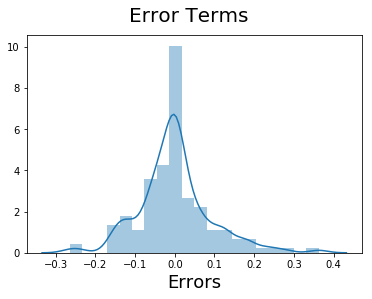

In [95]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 6: Making Predictions Using the Final Model



In [96]:
# Apply scaler() to all the columns except the ' 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','curbweight','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [97]:
df_test.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0
mean,113.322581,0.919355,0.887097,0.822581,0.435484,0.967742,0.437764,0.559481,0.480376,0.559663,...,0.016129,0.500000,0.048387,0.016129,0.0,0.048387,0.806452,0.048387,0.064516,0.0
std,59.300782,1.358620,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,...,0.127000,0.504082,0.216335,0.127000,0.0,0.216335,0.398304,0.216335,0.247676,0.0
min,4.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,67.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
50%,117.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.387931,0.547967,0.441667,0.588496,...,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
75%,167.500000,2.000000,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,...,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
max,202.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


#### Dividing into X_test and y_test

In [98]:
y_test = df_test.pop('price')
X_test = df_test

In [99]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new6.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [100]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 7 : Model Evaluation

Text(0,0.5,'y_pred')

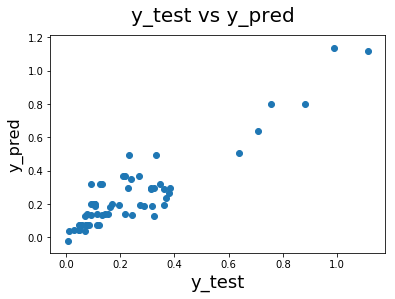

In [101]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [102]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8237117230811404